# WeatherPY
--------------------------------------------------------
## Starter Code to Generate Random Geographic Coordiniates and a List of Cities


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
## Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san clemente


Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | hailar
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | dryden
Processing Record 6 of Set 1 | hauterive
Processing Record 7 of Set 1 | mil'kovo
Processing Record 8 of Set 1 | sumbawa besar
Processing Record 9 of Set 1 | bamboo flat
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | alta
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | garbahaarrey
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | fortaleza
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | tsiombe
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | ca mau
Processing Record 23 of Set 1 | san juan de miraflores
Processing Record 24 of Set 1 | avarua
Processin

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san clemente,33.4270,-117.6120,17.01,67,0,5.81,US,1712637445
1,codrington,-38.2667,141.9667,13.80,56,99,6.59,AU,1712637832
2,hailar,49.2000,119.7000,1.49,74,89,4.77,CN,1712637833
3,bredasdorp,-34.5322,20.0403,15.41,87,92,2.39,ZA,1712637834
4,dryden,49.7833,-92.7503,2.16,100,100,2.06,CA,1712637835


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san clemente,33.4270,-117.6120,17.01,67,0,5.81,US,1712637445
1,codrington,-38.2667,141.9667,13.80,56,99,6.59,AU,1712637832
2,hailar,49.2000,119.7000,1.49,74,89,4.77,CN,1712637833
3,bredasdorp,-34.5322,20.0403,15.41,87,92,2.39,ZA,1712637834
4,dryden,49.7833,-92.7503,2.16,100,100,2.06,CA,1712637835


# Create the Scatter Plots Requested
## Latitude vs Temperature

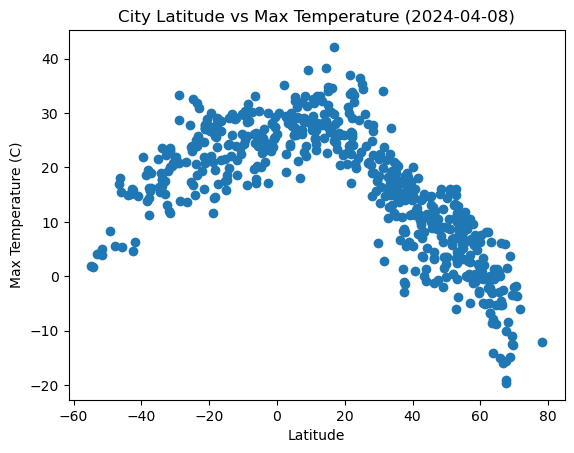

In [11]:
# Build scatter plot for latitude vs. temperature
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(xvalues,yvalues)
plt.title("City Latitude vs Max Temperature (2024-04-08)") # Date will be wrong when user runs this as it is set to the date I created code
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/LatvsTemp.png")

# Show plot
plt.show()

## Latitude vs Humidity

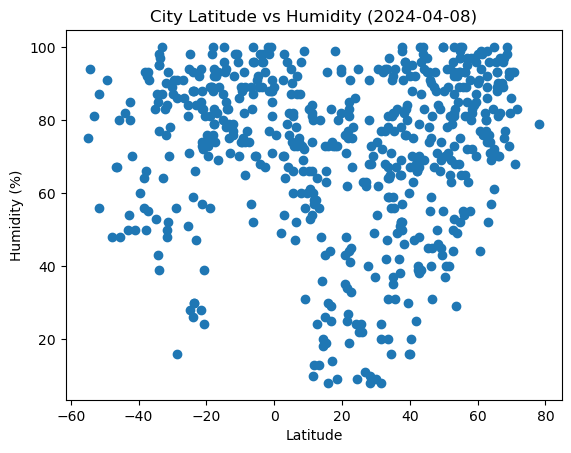

In [12]:
# Build scatter plot for latitude vs. temperature
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(xvalues,yvalues)
plt.title("City Latitude vs Humidity (2024-04-08)") # Date will be wrong when user runs this as it is set to the date I created code
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/LatvsHumidity.png")

# Show plot
plt.show()

## Latitude vs Cloudiness

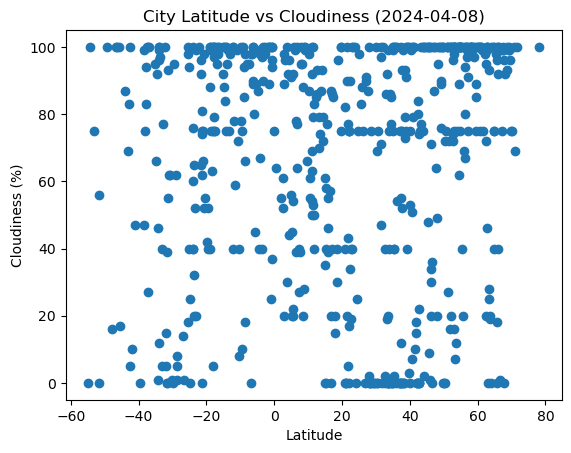

In [13]:
# Build scatter plot for latitude vs. temperature
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(xvalues,yvalues)
plt.title("City Latitude vs Cloudiness (2024-04-08)") # Date will be wrong when user runs this as it is set to the date I created code
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/LatvsClouds.png")

# Show plot
plt.show()

## Latitude vs Wind Speed

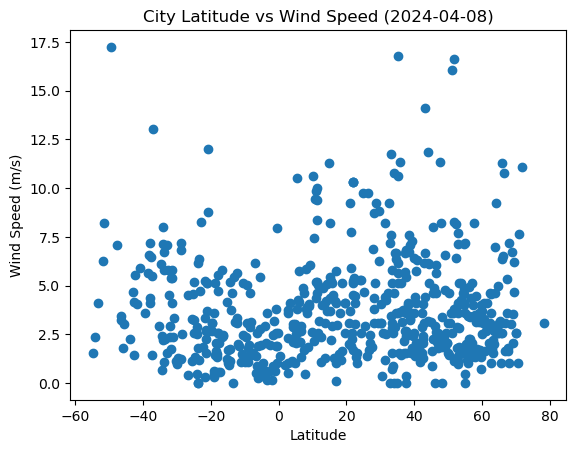

In [14]:
# Build scatter plot for latitude vs. temperature
xvalues = city_data_df["Lat"]
yvalues = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(xvalues,yvalues)
plt.title("City Latitude vs Wind Speed (2024-04-08)") # Date will be wrong when user runs this as it is set to the date I created code
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/LatvsWindSpeed.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [15]:
# Define a function to create Linear Regression plots
def linear_regression(xvalues, yvalues):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_vals = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))
    
    # plots for the graaph
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,regress_vals,"r-")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} (2024-04-08)") # Date will be wrong when user runs this as it is set to the date I created code
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, text_coordinates, fontsize=10, color='red')

    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(xvalues, yvalues)
    print(f"The correlation between the {x_label} and the {y_label} is {round(correlation[0],2)}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san clemente,33.4270,-117.6120,17.01,67,0,5.81,US,1712637445
2,hailar,49.2000,119.7000,1.49,74,89,4.77,CN,1712637833
4,dryden,49.7833,-92.7503,2.16,100,100,2.06,CA,1712637835
5,hauterive,46.0901,3.4459,9.42,91,100,2.94,FR,1712637836
6,mil'kovo,55.6078,37.7956,11.86,89,100,1.18,RU,1712637836


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,codrington,-38.2667,141.9667,13.80,56,99,6.59,AU,1712637832
3,bredasdorp,-34.5322,20.0403,15.41,87,92,2.39,ZA,1712637834
7,sumbawa besar,-8.5000,117.4333,31.67,65,98,2.88,ID,1712637837
9,west island,-12.1568,96.8225,28.99,79,40,5.66,CC,1712637839
11,adamstown,-25.0660,-130.1015,23.87,71,94,3.22,PN,1712637840


## Temperature vs Latitude linear Regression Plot

The r-squared is: 0.7885800417173201
The correlation between the Latitude and the Max Temp (C) is -0.89


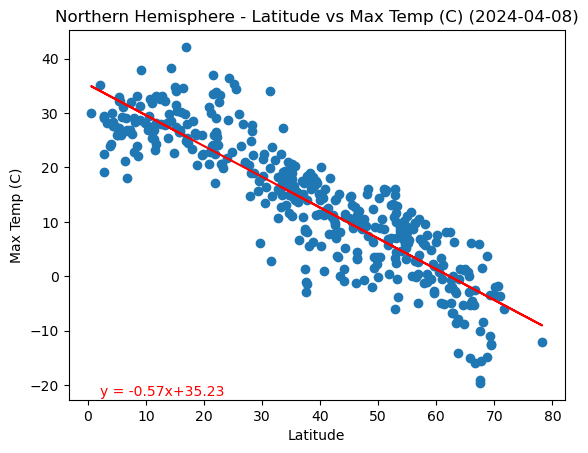

In [18]:
# Linear regression on Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Max Temp"]
hemisphere = "Northern"
text_coordinates = (2,-22)
x_label = "Latitude"
y_label = "Max Temp (C)"

linear_regression(xvalues,yvalues)

The r-squared is: 0.44539457846219205
The correlation between the Latitude and the Max Temp (C) is 0.67


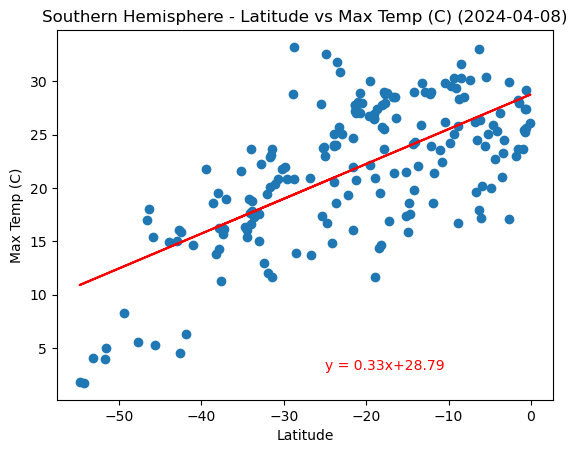

In [19]:
# Linear regression on Southern Hemisphere
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Max Temp"]
hemisphere = "Southern"
text_coordinates = (-25,3)
x_label = "Latitude"
y_label = "Max Temp (C)"

linear_regression(xvalues,yvalues)

There is a strong correlation between the latitude and the max temperature experienced on 2024-04-08 in bother hemispeheres. It is higher in the Northern hemisphere (0.89), indicating that the farther we move away from the equator the more the temperature decreases in a linear manner.

## Humidity vs Latitude Linear Regression Plot

The r-squared is: 0.098441260777762
The correlation between the Latitude and the Humidity (%) is 0.31


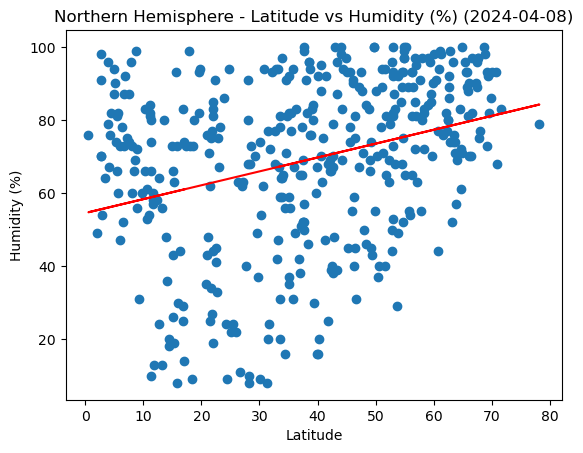

In [20]:
# Linear regression on Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Humidity"]
hemisphere = "Northern"
text_coordinates = (50,3)
x_label = "Latitude"
y_label = "Humidity (%)"

linear_regression(xvalues,yvalues)

The r-squared is: 0.07300087208928605
The correlation between the Latitude and the Humidity (%) is 0.27


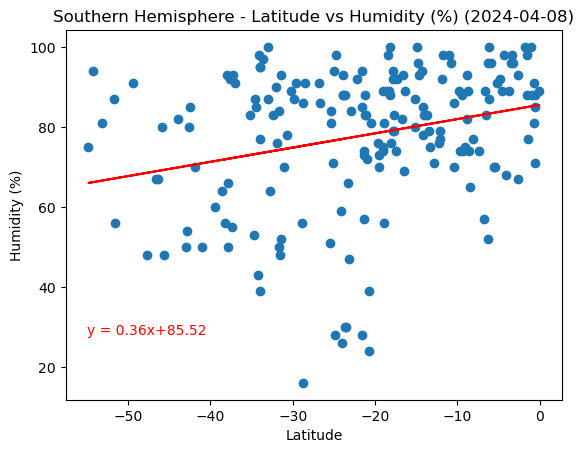

In [21]:
# Linear regression on Southern Hemisphere
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Humidity"]
hemisphere = "Southern"
text_coordinates = (-55,28)
x_label = "Latitude"
y_label = "Humidity (%)"

linear_regression(xvalues,yvalues)

There is no correlation between the humidity and the latitude in the Northern and Southern hemispheres, seeing a correlation of (0.31) and (0.27) respecitvely. The Southern hemisphere displays a very weak correlation but indicates that the closer to the equator, there is a chance of there being a higher humidty percentage.

In [22]:
## Cloudiness vs Latitude Linear Regression Plot

The r-squared is: 0.03537032813872763
The correlation between the Latitude and the Cloudiness (%) is 0.19


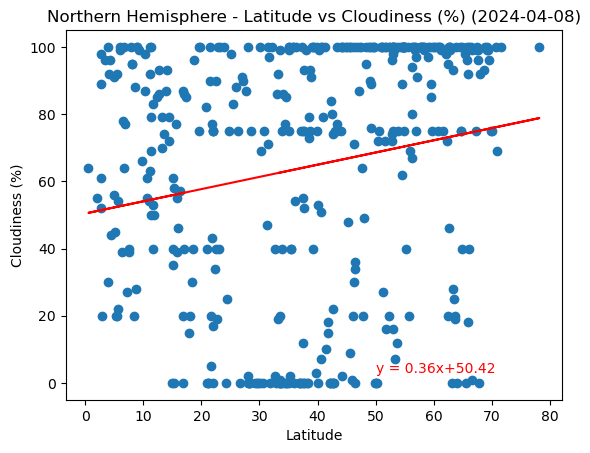

In [23]:
# Linear regression on Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Cloudiness"]
hemisphere = "Northern"
text_coordinates = (50,3)
x_label = "Latitude"
y_label = "Cloudiness (%)"

linear_regression(xvalues,yvalues)

The r-squared is: 0.07565304272488167
The correlation between the Latitude and the Cloudiness (%) is 0.28


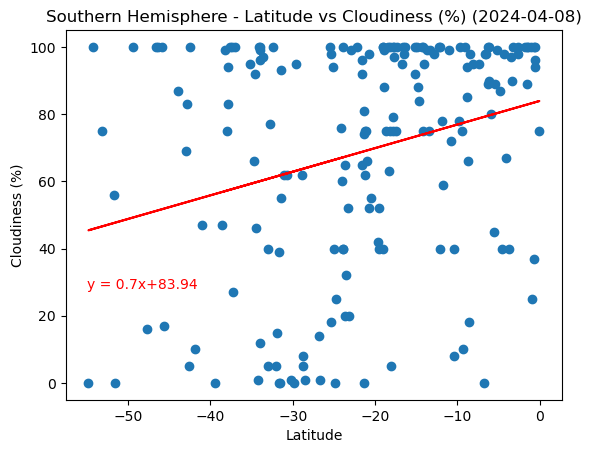

In [24]:
# Linear regression on Southern Hemisphere
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Cloudiness"]
hemisphere = "Southern"
text_coordinates = (-55,28)
x_label = "Latitude"
y_label = "Cloudiness (%)"

linear_regression(xvalues,yvalues)

There is no correlation between the percentage of overcast to the latitude in both hemispheres. The Northern hemisphere displays a very weak correlation (0.19), the Southern hemisphere has a slightly higher correlation at (0.28), though almost none existent based on it's r-swuared value at 0.08.

## Wind Speed vs Latitude Linear Regression Plot

The r-squared is: 0.0017566721032498856
The correlation between the Latitude and the Wind Speed (m/s) is -0.04


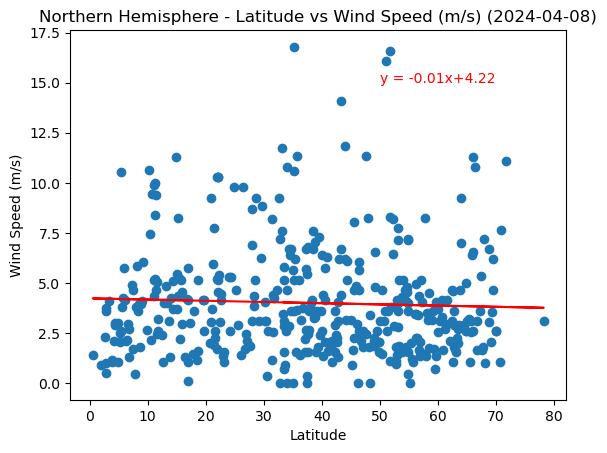

In [25]:
# Linear regression on Northern Hemisphere
xvalues = northern_hemi_df["Lat"]
yvalues = northern_hemi_df["Wind Speed"]
hemisphere = "Northern"
text_coordinates = (50,15)
x_label = "Latitude"
y_label = "Wind Speed (m/s)"

linear_regression(xvalues,yvalues)

The r-squared is: 0.138103000324765
The correlation between the Latitude and the Wind Speed (m/s) is -0.37


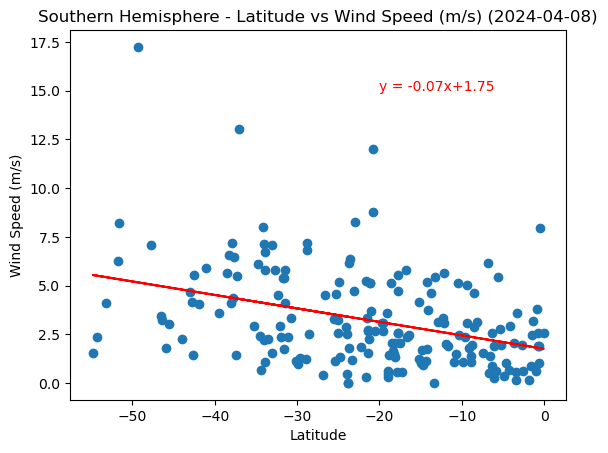

In [26]:
# Linear regression on Southern Hemisphere
xvalues = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Wind Speed"]
hemisphere = "Southern"
text_coordinates = (-20,15)
x_label = "Latitude"
y_label = "Wind Speed (m/s)"

linear_regression(xvalues,yvalues)

There is no correlation in the Northern hemisphere displaying a none existent correlation. In the Southern hemisphere,it was observed that there is a very weak correlation between the Wind Speed and latitude (0.37). Overall, it seems that on 2024-04-08, majority of the wind speeds observed had wind speeds less than 5.0m/s